# Assignment 3:
## Building a deep learning model for a real-world dataset.

In [61]:
# Importing Ncessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Step 1. Reading File


In [62]:
# Reading the Dataset
df = pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')


## Step 2. Data Exploration

In [63]:
# Checking the first 5 values of the data
df.head(5)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [64]:
# Checking the last 5 values
df.tail()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [65]:
# Checking the shape of data.
df.shape

# It has 299 rows and 13 columns.

(299, 13)

In [66]:
# Checking all column names.
df.columns


Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [67]:
# Checking all the non null values and data types of each column.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


## Step 3. Statistical Analysis

In [68]:
# Checking Stats.
df.describe()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


## Step 4. Handling Null Values

In [69]:
# Checking Null Values in Dataset
df.isnull().sum().sort_values(ascending = False)

# Dataset has no Null Values.

,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


## Step 5. Handling Duplicates

In [70]:
# Checking Duplicates in the Dataset
df.duplicated(keep = False).sum()

# There are no duplicate values in the Dataset.

np.int64(0)

## Step 6. Selecting Features And Target

In [71]:
# Selecting x as features ( All exept last 2 columns)
x = df.iloc[ : , :-2 ]
x

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0
...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1


In [72]:
# Selecting Target as y. (DEATH_EVENT column)
y = df.iloc[ : , -1]
y


,DEATH_EVENT
0,1
1,1
2,1
3,1
4,1
...,...
294,0
295,0
296,0
297,0


## Step 7. Standard Scaling

In [73]:
# Some of the column values are be greater than thE other, model might consider thEm more important,
# Will do Standard Scaling to avoid that issue.
scaler = StandardScaler()
x = scaler.fit_transform(x)

# Checking
x


array([[ 1.19294523e+00, -8.71104775e-01,  1.65728387e-04, ...,
        -1.50403612e+00,  7.35688190e-01, -6.87681906e-01],
       [-4.91279276e-01, -8.71104775e-01,  7.51463953e+00, ...,
        -1.41976151e-01,  7.35688190e-01, -6.87681906e-01],
       [ 3.50832977e-01, -8.71104775e-01, -4.49938761e-01, ...,
        -1.73104612e+00,  7.35688190e-01,  1.45416070e+00],
       ...,
       [-1.33339153e+00, -8.71104775e-01,  1.52597865e+00, ...,
         3.12043840e-01, -1.35927151e+00, -6.87681906e-01],
       [-1.33339153e+00, -8.71104775e-01,  1.89039811e+00, ...,
         7.66063830e-01,  7.35688190e-01,  1.45416070e+00],
       [-9.12335403e-01, -8.71104775e-01, -3.98321274e-01, ...,
        -1.41976151e-01,  7.35688190e-01,  1.45416070e+00]])

## Step 8. SMOTE
Synthetic Minority Over-sampling Technique is a way to balance your dataset when one class has fewer examples than the other.

### Example:

Imagine you're trying to predict if someone will die (1) or live (0), and your dataset looks like this:

Alive (0): 200 people

Died (1): 50 people

The model might learn to always predict "alive", because that gives 80% accuracy — even though it's not useful.

In [74]:
# Using Smote to balance y
# Importing library for smote.
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

# fit_resample(x, y) → learns from your data and adds new fake-but-useful rows for the minority class.
x, y= smote.fit_resample(x, y)

print("After SMOTE:", pd.Series(y).value_counts())


After SMOTE: DEATH_EVENT
1    203
0    203
Name: count, dtype: int64


## Step 9. Splitting (Train and Test)

In [75]:
# Splitting Data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)


In [76]:
# Checking shape of test and train dataset
print(X_train.shape)
print(X_test.shape)



(324, 11)
(82, 11)


## Step 10. Model Building

In [77]:
# Importing Necessary Libraries
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Dropout
from keras.activations import relu, sigmoid
from keras.metrics import AUC, Precision, Recall



In [78]:
# Building our ANN Model USING Sequential layers
# First layer has 64 neurons.
# ReLU activation helps the network learn faster and deal with complex patterns.
# input_dim=11 means giving 11 features (columns of dataset) as input.
# second layer, 32 neurons.
# third layer, 16.
# Last layer, 1 neuron, Sigmoid activation turns the output into a probability between 0 and 1
model = Sequential([

Dense(64, activation= 'relu', input_dim = 11),
Dropout(0.3),  # Drops 30% of neurons during training to prevent overfitting
Dense(32, activation= 'relu'),
Dropout(0.3),
Dense(16, activation= 'relu'),
Dense(1, activation= 'sigmoid')

])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Step 11. Model Summary

In [79]:
# Checking our Model Summary
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

## Step 12. Model Compilation

In [80]:
# Compiling our Model
# 'adam' is a smart algorithm that helps the model update its weights.
# 'binary_crossentropy' is the best choice for problems where the answer is: Yes (1) or No (0)
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy', AUC(), Precision(), Recall()]
)

# accuracy	% of total predictions the model got right
# AUC()	How well it separates the two classes (0 vs 1)
# Precision()	When it predicts "death", how often it's right
# Recall()	Out of all real deaths, how many it caught

## Step 13. Model Training

In [81]:
# Training our Model
# epochs = 100 : model will go through the entire training data 100 times to learn patterns.
# batch_size = 16: looks at 16 rows of data at a time, then updates its learning.
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=16,
    verbose=1
)


Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.4892 - auc_2: 0.4944 - loss: 0.7261 - precision_2: 0.5295 - recall_2: 0.4040 - val_accuracy: 0.5231 - val_auc_2: 0.6094 - val_loss: 0.6715 - val_precision_2: 0.5135 - val_recall_2: 0.5938
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5350 - auc_2: 0.5531 - loss: 0.6932 - precision_2: 0.5326 - recall_2: 0.5085 - val_accuracy: 0.6308 - val_auc_2: 0.6676 - val_loss: 0.6563 - val_precision_2: 0.6053 - val_recall_2: 0.7188
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5723 - auc_2: 0.5938 - loss: 0.6751 - precision_2: 0.5389 - recall_2: 0.5157 - val_accuracy: 0.6615 - val_auc_2: 0.6974 - val_loss: 0.6430 - val_precision_2: 0.6316 - val_recall_2: 0.7500
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6591 - auc_2: 0.7262 - loss: 0.6400 - precision_2: 0.6536 - recall_2: 0.6600 - val_accuracy: 0.6615 - val_auc_2: 0.7159 - val_loss: 0.6309 - val_precision_2: 0.6389 - val_reca

## Step 14. Accuracy And Loss Visualization

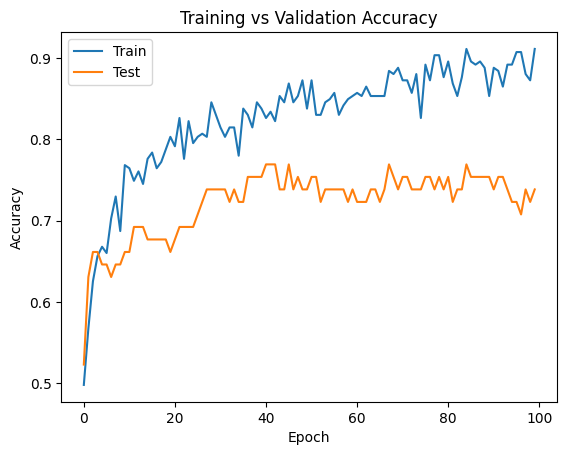

In [82]:
# Making a plot for training and testing Accuracy..
plt.plot(history.history['accuracy'], label = 'Train')
plt.plot(history.history['val_accuracy'], label = 'Test')

# Deciding the Labels and Title
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')

# Showing Legend and plot
plt.legend()
plt.show()


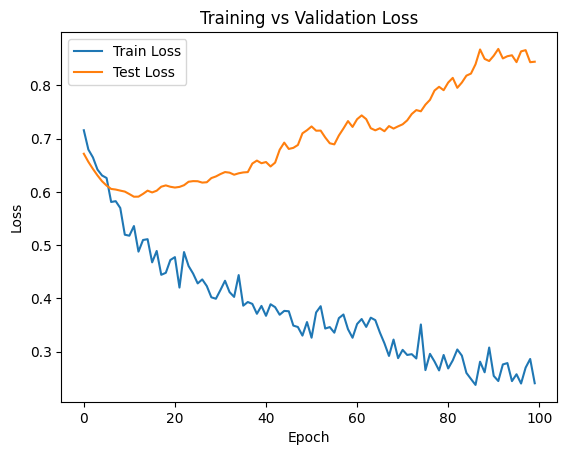

In [83]:
# Making a plot for Training and Testing Loss.
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')

# Decising Labels and Title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')

# Show legend and plot
plt.legend()
plt.show()


## Step 15. Model Prediction

In [84]:
# Predicting Model
y_pred = model.predict(X_test)
y_pred


1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([[2.64814153e-04],
       [9.26488340e-01],
       [9.79698718e-01],
       [1.96209252e-02],
       [8.41604710e-01],
       [7.12176621e-01],
       [2.93461327e-02],
       [9.62459266e-01],
       [1.15407765e-01],
       [9.59847629e-01],
       [9.33173299e-01],
       [1.28793418e-02],
       [4.24071029e-02],
       [8.79587591e-01],
       [2.34663882e-03],
       [2.52279062e-02],
       [8.10295582e-01],
       [9.63549852e-01],
       [1.84321229e-03],
       [7.85867691e-01],
       [7.12511176e-03],
       [8.39027405e-01],
       [9.71189320e-01],
       [2.57637672e-04],
       [9.90889192e-01],
       [9.40619633e-02],
       [8.06880772e-01],
       [1.45257148e-03],
       [1.47504201e-02],
       [9.77658689e-01],
       [3.82081023e-03],
       [9.73671794e-01],
       [9.34308767e-01],
       [1.78293878e-04],
       [1.02963718e-03],
       [2.70682154e-04],
       [1.06159470e-03],
       [7.94613436e-02],
       [9.27768886e-01],
       [9.90129054e-01],


In [85]:
# If a prediction is more than 0.5, calling it a 1 (yes), otherwise calling it a 0 (no)."
predictions = np.where(y_pred > 0.5, 1, 0)
predictions


array([[0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1]])

## Step 16. Model Evaluation

In [86]:
# Importing necessary libraries for the evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


In [87]:
# Evaluating our Model
accu_train = model.evaluate(X_train, y_train)
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
auc = roc_auc_score(y_test, predictions)
classification = classification_report(y_test, predictions)
conMat = confusion_matrix(y_test, predictions)
matDisplay = ConfusionMatrixDisplay(conMat)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9301 - auc_2: 0.9815 - loss: 0.1935 - precision_2: 0.9071 - recall_2: 0.9629 


In [88]:
# Printing
print(f"Train Accuracy: {accu_train[1]:.4f}")
print()
print(f"Test Accuracy: {accuracy:.4f}")
print()
print(f"Precision: {precision:.4f}")
print()
print(f"Recall: {recall:.4f}")
print()
print(f"AUC: {auc:.4f}")
print()
print(f"Classification Report:\n {classification}")



Train Accuracy: 0.9074

Test Accuracy: 0.8659

Precision: 0.8409

Recall: 0.9024

AUC: 0.8659

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.83      0.86        41
           1       0.84      0.90      0.87        41

    accuracy                           0.87        82
   macro avg       0.87      0.87      0.87        82
weighted avg       0.87      0.87      0.87        82



## Step 17. Classification Report

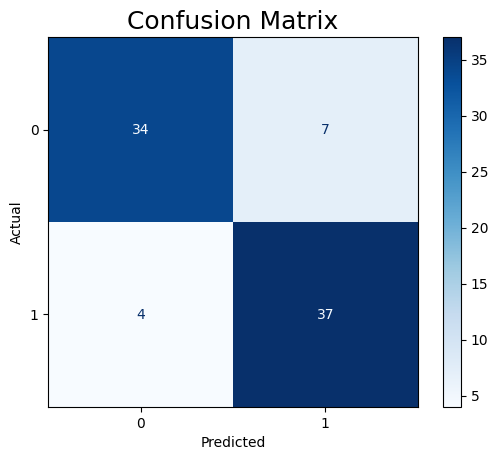

In [89]:
# Visualization Of Classification Report
matDisplay.plot(cmap = 'Blues')

# Deciding labels and the title
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('Actual', fontsize=10)
plt.title('Confusion Matrix', fontsize=18)

# Showing the plot
plt.show()
